In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import datetime as dt
import numpy as np

# Load data

In [2]:
files = os.listdir("data")
# Sort dates
dates = [dt.datetime.strptime(re.findall(r'\d{4}-\d{2}-\d{2}',f)[0],'%Y-%m-%d') for f in files]
sorted(dates,reverse=True)
dates = [i.strftime('%Y-%m-%-d') for i in dates]

In [3]:
dfs = {d: pd.read_csv(f'data/worldometers-{d}.tsv',sep="\t") for d in dates}

# Preprocessing
* Replace nan values in numerical attributes with ```0```
* Replace nan values in categorical attributes with ```Other```

In [25]:
for df in dfs.values():
    for i in range(1, df.shape[1] - 1):
        df.iloc[:,i] = df.iloc[:,i].fillna(0)
    df.iloc[:,-1] = df.iloc[:,-1].fillna('Other')

# Example data (lastest data)

In [4]:
df = dfs[dates[0]]
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,48999737,27187.0,798551.0,306.0,38799986.0,12292.0,9401200.0,12259.0,146830.0,2393.0,747324581.0,2239391.0,3.337178e+08,North America
1,India,34555431,10549.0,467468.0,488.0,33967962.0,10264.0,120001.0,8944.0,24701.0,334.0,635924763.0,454564.0,1.398976e+09,Asia
2,Brazil,22055608,12191.0,613697.0,281.0,21275209.0,10496.0,166702.0,8318.0,102741.0,2859.0,63776166.0,297086.0,2.146728e+08,South America
3,UK,10020750,46991.0,144433.0,147.0,8874965.0,40777.0,1001352.0,928.0,146535.0,2112.0,357537501.0,5228313.0,6.838487e+07,Europe
4,Russia,9468189,33796.0,269057.0,1238.0,8164826.0,38450.0,1034306.0,2300.0,64841.0,1843.0,222300000.0,1522373.0,1.460220e+08,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Marshall Islands,4,NaN,NaN,NaN,4.0,NaN,0.0,NaN,67.0,NaN,NaN,NaN,5.974900e+04,Australia/Oceania
220,Samoa,3,NaN,NaN,NaN,3.0,NaN,0.0,NaN,15.0,NaN,NaN,NaN,2.002580e+05,Australia/Oceania
221,Saint Helena,2,NaN,NaN,NaN,2.0,NaN,0.0,NaN,328.0,NaN,NaN,NaN,6.102000e+03,Africa
222,Micronesia,1,NaN,NaN,NaN,1.0,NaN,0.0,NaN,9.0,NaN,NaN,NaN,1.167090e+05,Australia/Oceania


In [5]:
df = df[df["Country,Other"] != "China"]
df =  df[df["Country,Other"] != "India"]

Text(0, 0.5, 'NewCases')

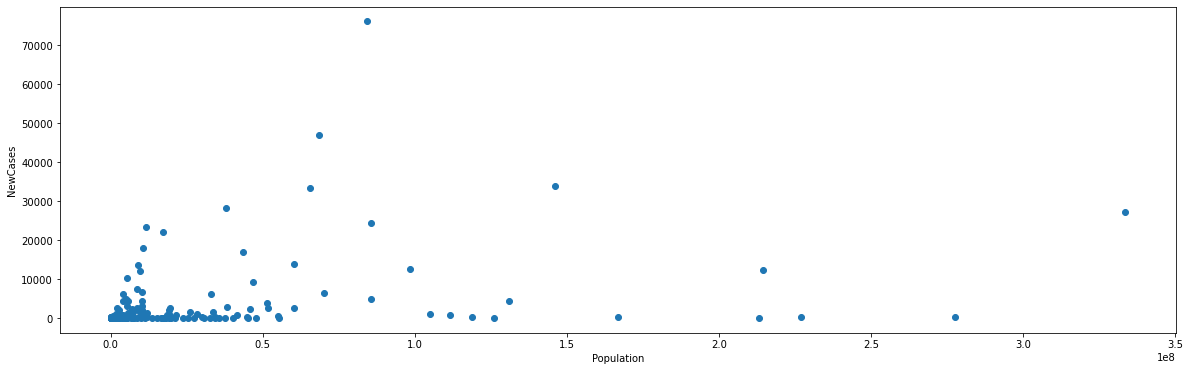

In [12]:
plt.rcParams['figure.figsize'] = [20, 6]
  
plt.scatter(df["Population"],df["NewCases"])
plt.xlabel("Population")
plt.ylabel("NewCases")